In [1]:
pip install statsmodels

## 1. 라이브러리 불러오기

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture

from sklearn.cluster import estimate_bandwidth
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import roc_curve, auc

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import ttest_1samp

from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 파일 경로를 각자 컴퓨터 환경에 맞게 수정하세요!
file_path = '/content/drive/MyDrive/부리부리데마왕/dataset/'

## 2. 데이터 전처리

In [ ]:
Train = pd.read_csv(file_path +'creditcard_data.csv')
drop_data = ['Amount', 'Time', 'Class']
train = Train.drop(columns = drop_data, axis=1)
target = Train['Class'].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train)

# 스케일링된 데이터를 DataFrame으로 변환
scaled_data_df = pd.DataFrame(scaled_data, columns=train.columns)

In [ ]:
scaled_data_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-0.694242,-0.044075,1.672773,0.973363,-0.245116,0.347066,0.193684,0.082636,0.331129,0.083383,...,0.496280,0.326119,-0.024922,0.382857,-0.176909,0.110507,0.246582,-0.392178,0.330891,-0.063781
1,0.608494,0.161175,0.109799,0.316521,0.043483,-0.061822,-0.063696,0.071252,-0.232492,-0.153353,...,-0.179087,-0.089609,-0.307375,-0.880073,0.162203,-0.561130,0.320691,0.261064,-0.022256,0.044608
2,-0.693500,-0.811577,1.169469,0.268230,-0.364571,1.351450,0.639781,0.207371,-1.378672,0.190697,...,-2.778558,0.680976,0.337632,1.063361,1.456320,-1.138090,-0.628540,-0.288454,-0.137137,-0.181020
3,-0.493325,-0.112170,1.182516,-0.609727,-0.007469,0.936147,0.192075,0.316016,-1.262500,-0.050471,...,-1.514204,-0.269853,-0.147442,0.007270,-0.304774,-1.941024,1.241900,-0.460225,0.155396,0.186188
4,-0.591330,0.531540,1.021412,0.284654,-0.295015,0.071997,0.479307,-0.226511,0.744327,0.691622,...,0.987035,0.529940,-0.012838,1.100014,-0.220121,0.233250,-0.395205,1.041609,0.543619,0.651815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,0.061426,0.563798,-0.360104,-0.526249,0.818922,-0.177123,0.656967,0.096363,-0.185742,-0.603780,...,0.158350,0.000878,-0.427765,-1.114121,0.080620,0.169735,-0.836161,0.257299,0.539946,0.208443
284802,-6.065833,6.099275,-6.486234,-1.459640,-3.886604,-1.956689,-3.975628,6.116562,1.742558,4.000710,...,-0.838927,1.914364,0.290603,0.154149,1.624574,-0.840999,2.756316,0.518496,2.337897,2.495525
284803,-0.374122,-0.033356,1.342144,-0.521652,0.629039,0.794443,0.019671,0.246885,0.532300,-0.896295,...,-1.898625,0.077332,0.291626,1.273784,0.019960,-1.677917,-1.163729,-0.819655,0.169641,-0.162163
284804,0.980021,-0.182434,-2.143201,-0.393984,1.905830,2.275257,-0.239935,0.593138,0.393631,-0.445227,...,-0.709121,0.001813,0.315913,0.796790,-0.060051,1.056942,0.509794,-0.181188,0.011037,-0.080467


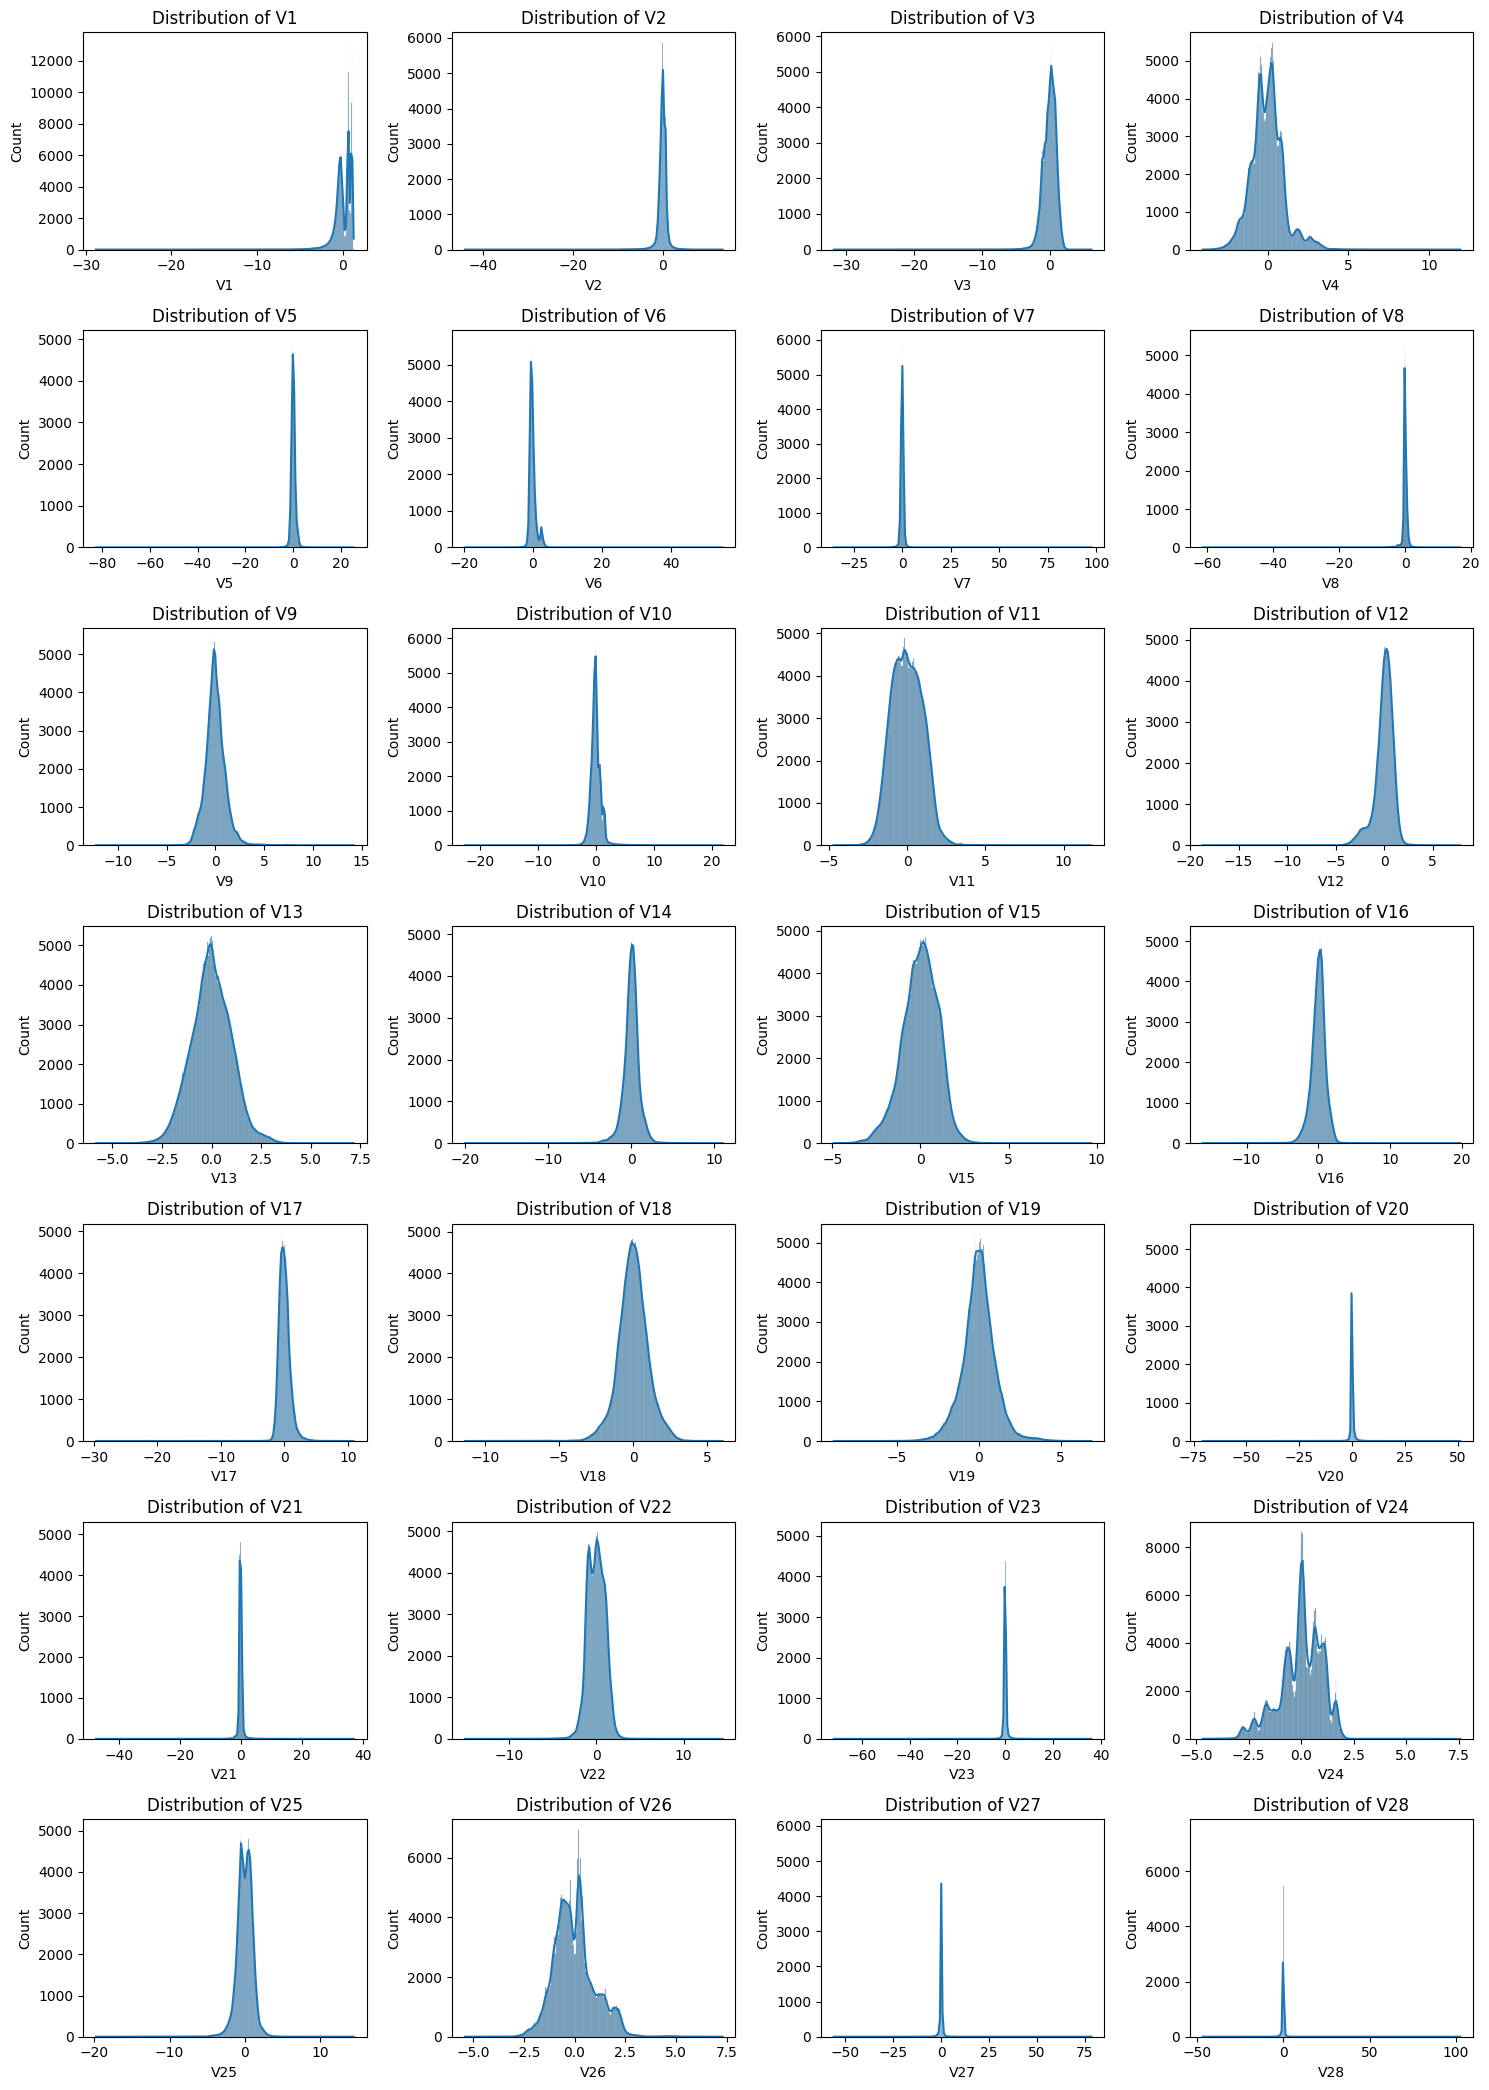

In [ ]:
num_cols=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
# 그래프의 크기 및 행, 열 설정
num_cols_count = len(num_cols)
num_cols_per_row = 4  # 각 행당 그래프 수를 조절
num_rows = int(math.ceil(num_cols_count / num_cols_per_row))

plt.figure(figsize=(15, 3 * num_rows))

for i, feature in enumerate(num_cols, 1):
    plt.subplot(num_rows, num_cols_per_row, i)
    sns.histplot(scaled_data_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

# 그래프 출력
plt.tight_layout()
plt.show()

## 3. 통계적 분석을 통한 데이터 선택

In [ ]:
scaled_data_df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [ ]:
# T-검정을 이용한 P-value 값
def calculate_column_p_values(df):
    p_values = {}
    for column in df.columns:
        # 각 열에 대해 t-검정 수행
        t_statistic, p_value = ttest_1samp(df[column], 0)
        p_values[column] = p_value
    return p_values

# p-value 계산
p_values = calculate_column_p_values(scaled_data_df)

# p-values를 데이터 프레임으로 변환하여 보기 좋게 출력
p_values_df = pd.DataFrame(list(p_values.items()), columns=['Column', 'P-Value'])
p_values_df.style.set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '10pt')]}]
).set_properties(**{'font-size': '10pt'})

,Column,P-Value
0,V1,1.000000
1,V2,1.000000
2,V3,1.000000
3,V4,1.000000
4,V5,1.000000
5,V6,1.000000
6,V7,1.000000
7,V8,1.000000
8,V9,1.000000
9,V10,1.000000


In [ ]:
X = scaled_data_df
y = target
# OLS 모델을 적합합니다.
model = OLS(y, X).fit()

# 모델 요약을 출력합니다.
model_summary = model.summary()
print(model_summary)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.521
Model:                            OLS   Adj. R-squared (uncentered):              0.521
Method:                 Least Squares   F-statistic:                          1.104e+04
Date:                Fri, 15 Dec 2023   Prob (F-statistic):                        0.00
Time:                        09:07:16   Log-Likelihood:                      6.0640e+05
No. Observations:              284806   AIC:                                 -1.213e+06
Df Residuals:                  284778   BIC:                                 -1.212e+06
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### P-value 0.005 이상 V22(0.535), V23(0.039), V25(0.011)
--> 각각 큰 순서대로 변수 제거 수행

In [ ]:
X = scaled_data_df.drop(columns = 'V22')
y = target
# OLS 모델을 적합합니다.
model = OLS(y, X).fit()

# 모델 요약을 출력합니다.
model_summary = model.summary()
print(model_summary)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.521
Model:                            OLS   Adj. R-squared (uncentered):              0.521
Method:                 Least Squares   F-statistic:                          1.145e+04
Date:                Fri, 15 Dec 2023   Prob (F-statistic):                        0.00
Time:                        09:07:16   Log-Likelihood:                      6.0640e+05
No. Observations:              284806   AIC:                                 -1.213e+06
Df Residuals:                  284779   BIC:                                 -1.212e+06
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

모델의 R-square 값 변동성이 없으므로 계속해서 진행

In [ ]:
X = scaled_data_df.drop(columns = ['V22', 'V23'])
y = target
# OLS 모델을 적합합니다.
model = OLS(y, X).fit()

# 모델 요약을 출력합니다.
model_summary = model.summary()
print(model_summary)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.521
Model:                            OLS   Adj. R-squared (uncentered):              0.521
Method:                 Least Squares   F-statistic:                          1.189e+04
Date:                Fri, 15 Dec 2023   Prob (F-statistic):                        0.00
Time:                        09:07:17   Log-Likelihood:                      6.0640e+05
No. Observations:              284806   AIC:                                 -1.213e+06
Df Residuals:                  284780   BIC:                                 -1.212e+06
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
X = scaled_data_df.drop(columns = ['V22', 'V23', 'V25'])
y = target
# OLS 모델을 적합합니다.
model = OLS(y, X).fit()

# 모델 요약을 출력합니다.
model_summary = model.summary()
print(model_summary)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.521
Model:                            OLS   Adj. R-squared (uncentered):              0.521
Method:                 Least Squares   F-statistic:                          1.237e+04
Date:                Fri, 15 Dec 2023   Prob (F-statistic):                        0.00
Time:                        09:07:18   Log-Likelihood:                      6.0640e+05
No. Observations:              284806   AIC:                                 -1.213e+06
Df Residuals:                  284781   BIC:                                 -1.212e+06
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

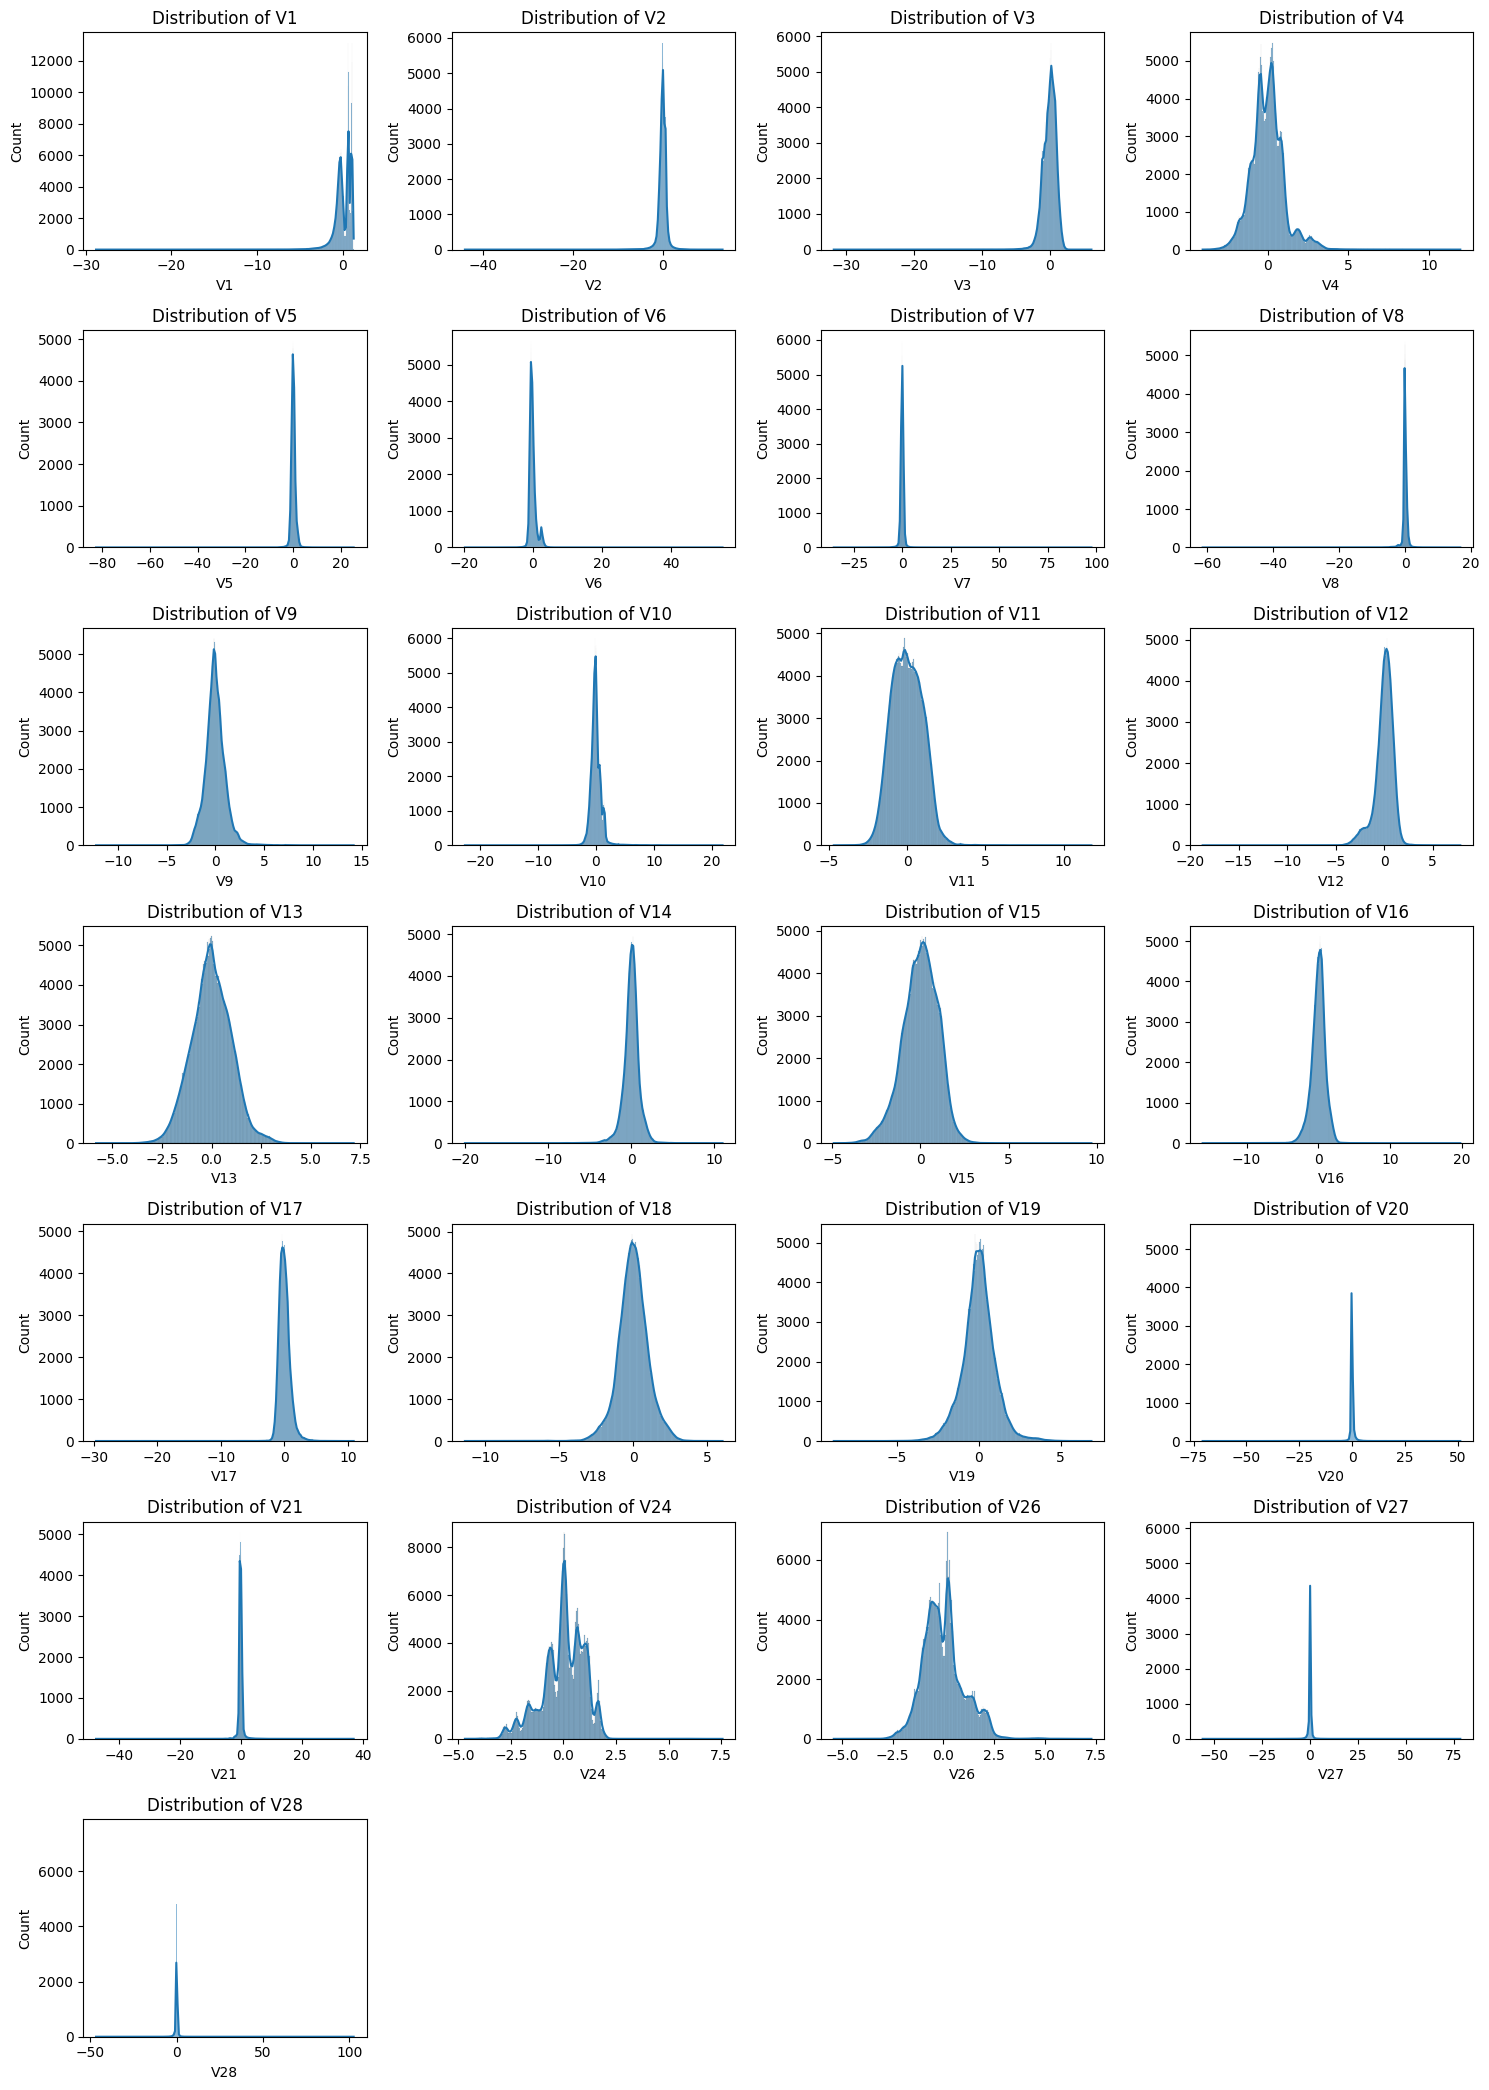

In [ ]:
num_cols=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V24', 'V26', 'V27', 'V28']

# 그래프의 크기 및 행, 열 설정
num_cols_count = len(num_cols)
num_cols_per_row = 4  # 각 행당 그래프 수를 조절
num_rows = int(math.ceil(num_cols_count / num_cols_per_row))

plt.figure(figsize=(15, 3 * num_rows))

for i, feature in enumerate(num_cols, 1):
    plt.subplot(num_rows, num_cols_per_row, i)
    sns.histplot(X[feature], kde=True)
    plt.title(f'Distribution of {feature}')

# 그래프 출력
plt.tight_layout()
plt.show()

## 4. 차원축소

#### 데이터 분포의 모양과 y축 값이 유사한 데이터 pca 수행
--> V2, V5, V6, V7, V8, V20, V21, V27, V28

In [ ]:
y = pd.DataFrame(y,columns=['Class'])
data = pd.concat([X, y], axis=1)

<Axes: >

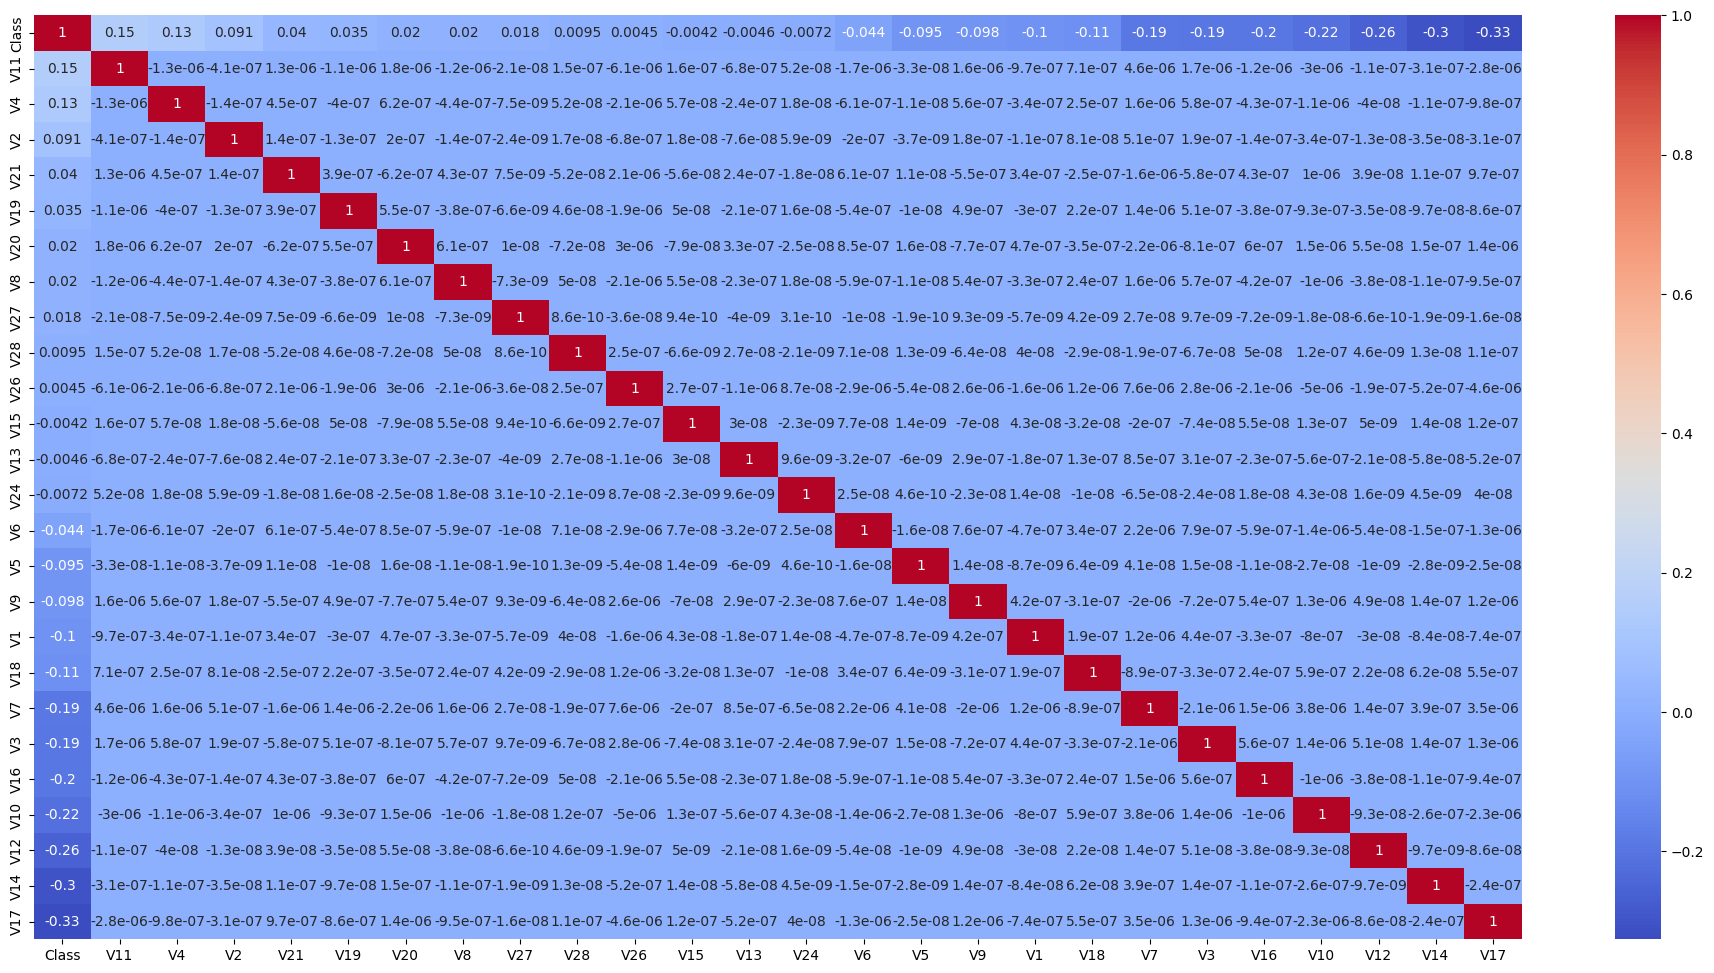

In [ ]:
# class에 대한 상관관계 분석 시각화
X=30
cols=data.corr().nlargest(X, 'Class')['Class'].index
map=data[cols].corr()
plt.figure(figsize=(24,12))
sns.heatmap(map, annot=True, cmap='coolwarm') # fmt='.2f'

### PCA 4개부터 시행

In [ ]:
group = ['V2', 'V5', 'V6', 'V7', 'V8', 'V20', 'V21', 'V27', 'V28']

try_data = data.copy()
try_data = try_data.drop(columns = group)

In [ ]:
selected_data_X = data[group]
pca = PCA(n_components=4)

selected_data_X_pca_4 = pca.fit_transform(selected_data_X)

pca_result_df_4 = pd.DataFrame(selected_data_X_pca_4, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4'])

print(pca_result_df_4.head())


       PCA1      PCA2      PCA3      PCA4
0  0.178215  0.478765 -0.046837 -0.045002
1  0.055952 -0.099708 -0.223408  0.150888
2  0.659525  1.430658  0.416839 -0.360051
3  0.688350  0.472599  0.245648 -0.108703
4  0.174887  0.428317 -0.107364  0.162821


In [ ]:
try_data_pca4 = pd.concat([try_data, pca_result_df_4], axis =1)

X = try_data_pca4.drop(columns = ['Class'])
y = target
# OLS 모델을 적합합니다.
model = OLS(y, X).fit()

# 모델 요약을 출력합니다.
model_summary = model.summary()
print(model_summary)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.495
Model:                            OLS   Adj. R-squared (uncentered):              0.495
Method:                 Least Squares   F-statistic:                          1.394e+04
Date:                Fri, 15 Dec 2023   Prob (F-statistic):                        0.00
Time:                        09:09:20   Log-Likelihood:                      5.9891e+05
No. Observations:              284806   AIC:                                 -1.198e+06
Df Residuals:                  284786   BIC:                                 -1.198e+06
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### R square 값이 0.521 -> 0.495로 감소해 좀 더 pca 갯수 증가

In [ ]:
selected_data_X = data[group]
pca = PCA(n_components=5)

selected_data_X_pca_5 = pca.fit_transform(selected_data_X)

pca_result_df_5 = pd.DataFrame(selected_data_X_pca_5, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'])

print(pca_result_df_5.head())


       PCA1      PCA2      PCA3      PCA4      PCA5
0  0.178215  0.478765 -0.046837 -0.045002  0.046019
1  0.055952 -0.099708 -0.223408  0.150888 -0.121083
2  0.659525  1.430658  0.416839 -0.360051  0.809282
3  0.688350  0.472599  0.245648 -0.108703  0.228161
4  0.174887  0.428317 -0.107364  0.162821 -0.530952


In [ ]:
try_data_pca5 = pd.concat([try_data, pca_result_df_5], axis =1)

X = try_data_pca5.drop(columns = ['Class'])
y = target
# OLS 모델을 적합합니다.
model = OLS(y, X).fit()

# 모델 요약을 출력합니다.
model_summary = model.summary()
print(model_summary)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.503
Model:                            OLS   Adj. R-squared (uncentered):              0.503
Method:                 Least Squares   F-statistic:                          1.371e+04
Date:                Fri, 15 Dec 2023   Prob (F-statistic):                        0.00
Time:                        09:09:21   Log-Likelihood:                      6.0118e+05
No. Observations:              284806   AIC:                                 -1.202e+06
Df Residuals:                  284785   BIC:                                 -1.202e+06
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### 0.495 -> 0.503으로 증가

In [ ]:
selected_data_X = data[group]
pca = PCA(n_components=6)

selected_data_X_pca_6 = pca.fit_transform(selected_data_X)
pca_result_df_6 = pd.DataFrame(selected_data_X_pca_6, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6'])

print(pca_result_df_6.head())


       PCA1      PCA2      PCA3      PCA4      PCA5      PCA6
0  0.178215  0.478765 -0.046837 -0.045002  0.046019 -0.064695
1  0.055952 -0.099708 -0.223408  0.150888 -0.121083  0.066034
2  0.659525  1.430658  0.416839 -0.360051  0.809282 -0.225795
3  0.688350  0.472599  0.245648 -0.108703  0.228161  0.201812
4  0.174887  0.428317 -0.107364  0.162821 -0.530952  0.673838


In [ ]:
try_data_pca6 = pd.concat([try_data, pca_result_df_6], axis =1)

X = try_data_pca6.drop(columns = ['Class'])
y = target
# OLS 모델을 적합합니다.
model = OLS(y, X).fit()

# 모델 요약을 출력합니다.
model_summary = model.summary()
print(model_summary)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.503
Model:                            OLS   Adj. R-squared (uncentered):              0.503
Method:                 Least Squares   F-statistic:                          1.310e+04
Date:                Fri, 15 Dec 2023   Prob (F-statistic):                        0.00
Time:                        09:09:22   Log-Likelihood:                      6.0129e+05
No. Observations:              284806   AIC:                                 -1.203e+06
Df Residuals:                  284784   BIC:                                 -1.202e+06
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### 성능의 변화가 없으므로 PCA 5개로 모델 실행

##5. ADASYN 방법을 이용한 데이터 증강

### 기존의 scaling 되지 않은 데이터 + PCA DATA

Column: 30 -> 24

In [ ]:
data = pd.concat([train, pca_result_df_5], axis =1)

In [ ]:
data = data.drop(columns = group)
y = pd.DataFrame(y,columns=['Class'])
data = pd.concat([data, y], axis =1)

In [ ]:
data.reset_index(drop=True, inplace=True)
Normal = data[data['Class']== 0]

In [ ]:
from imblearn.over_sampling import ADASYN

X = data.drop(columns = ['Class'])
y = target

# ADASYN 모델 초기화 및 샘플링 전략 설정
adasyn = ADASYN(sampling_strategy={1: 250000}, random_state=42)

# ADASYN을 사용하여 오버샘플링
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# 새로운 데이터프레임 생성
balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Class')], axis=1)

Fraud = balanced_data[balanced_data['Class']==1]
Fraud.shape

(250046, 25)

In [ ]:
data_ADASYN = pd.concat([Fraud, Normal], ignore_index=True)
data_ADASYN.shape

(534360, 25)

In [5]:
data_ADASYN = pd.read_csv(file_path +'data_select.csv')

## 6. SVM, KNN, NavieBayes, 로지스틱 model 수행

In [15]:
Train = data_ADASYN.drop('Class',axis=1).values
target = data_ADASYN['Class'].values

X_train, X_test, Y_train, Y_test = train_test_split(Train, target, test_size = 0.20, random_state = 25)
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.20, random_state = 25)

print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(X_test.shape,Y_test.shape)


(341990, 24) (341990,)
(85498, 24) (85498,)
(106872, 24) (106872,)


### 1. 로지스틱

In [16]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr_train = model_lr.fit(x_train, y_train)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 검증 세트를 사용하여 예측 수행
y_pred = model_lr.predict(x_val)

# 성능 평가
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8775877798311071
Precision: 0.8943712960231691
Recall: 0.8363298979412723
F1 Score: 0.8643773487106389


In [20]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

expected = Y_test
predicted = model_lr_train.predict(X_test)
f1 = f1_score(expected, predicted)

accuracy = accuracy_score(expected, predicted)
precision = precision_score(expected, predicted)
recall = recall_score(expected, predicted)
f1 = f1_score(expected, predicted)

print(metrics.classification_report(expected, predicted))
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

              precision    recall  f1-score   support

           0       0.86      0.91      0.89     56892
           1       0.89      0.84      0.87     49980

    accuracy                           0.88    106872
   macro avg       0.88      0.88      0.88    106872
weighted avg       0.88      0.88      0.88    106872

Accuracy: 0.8779193801931282
Precision: 0.8945243232849788
Recall: 0.837735094037615
F1 Score: 0.8651988386870137


### 2. 베르누이 NaiveBayes

In [21]:
from sklearn.naive_bayes import BernoulliNB

model_NB = BernoulliNB(alpha=2.0)
model_NB_train = model_NB.fit(x_train, y_train)

In [22]:
# 검증 세트를 사용하여 예측 수행
y_pred = model_NB_train.predict(x_val)

# 성능 평가
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8128143348382418
Precision: 0.8431992640082799
Recall: 0.7354497354497355
F1 Score: 0.785647317243042


In [23]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

expected = Y_test
predicted = model_NB_train.predict(X_test)
f1 = f1_score(expected, predicted)

accuracy = accuracy_score(expected, predicted)
precision = precision_score(expected, predicted)
recall = recall_score(expected, predicted)
f1 = f1_score(expected, predicted)

print(metrics.classification_report(expected, predicted))
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


              precision    recall  f1-score   support

           0       0.79      0.88      0.83     56892
           1       0.85      0.74      0.79     49980

    accuracy                           0.81    106872
   macro avg       0.82      0.81      0.81    106872
weighted avg       0.82      0.81      0.81    106872

Accuracy: 0.8141702223220301
Precision: 0.845096241979835
Recall: 0.7378951580632253
F1 Score: 0.7878658406323434


### 3. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_params = {
    'n_neighbors': [5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

model_knn = KNeighborsClassifier()
knn_grid_search = GridSearchCV(model_knn, knn_params, cv=5)
model_knn_train = knn_grid_search.fit(x_train, y_train)

In [26]:
# 검증 세트를 사용하여 예측 수행
y_pred = model_knn_train.predict(x_val)

# 성능 평가
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9998362534796136
Precision: 0.9996490612388138
Recall: 1.0
F1 Score: 0.9998244998244998


In [29]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

expected = Y_test
predicted = model_knn_train.predict(X_test)
f1 = f1_score(expected, predicted)

accuracy = accuracy_score(expected, predicted)
precision = precision_score(expected, predicted)
recall = recall_score(expected, predicted)
f1 = f1_score(expected, predicted)

print(metrics.classification_report(expected, predicted))
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56892
           1       1.00      1.00      1.00     49980

    accuracy                           1.00    106872
   macro avg       1.00      1.00      1.00    106872
weighted avg       1.00      1.00      1.00    106872

Accuracy: 0.99888651845198
Precision: 0.997624703087886
Recall: 1.0
F1 Score: 0.9988109393579072


In [ ]:
 pip install joblib

In [ ]:
from joblib import dump

# 파일 경로를 각자 컴퓨터 환경에 맞게 수정하세요!
path = '/content/drive/MyDrive/부리부리데마왕/진기/'

# 모델을 파일로 저장
dump(model_knn_train, path + 'trained_knn_model.joblib')

['/content/drive/MyDrive/부리부리데마왕/진기/trained_knn_model.joblib']

### 4. SVM

In [ ]:
from sklearn.svm import SVC

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'random_state':[42]
}

# SVM 모델 생성 및 Grid Search
svm = SVC()
svm_grid_search = GridSearchCV(svm, svm_params, cv=5)

# 모델 훈련
model_svm_train = svm_grid_search.fit(x_train, y_train)

In [ ]:
# 검증 세트를 사용하여 예측 수행
y_pred = model_svm_train.predict(x_val)

# 성능 평가
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

expected = Y_test
predicted = model_svm_train.predict(X_test)
f1 = f1_score(expected, predicted)

accuracy = accuracy_score(expected, predicted)
precision = precision_score(expected, predicted)
recall = recall_score(expected, predicted)
f1 = f1_score(expected, predicted)

print(metrics.classification_report(expected, predicted))
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85276
           1       1.00      1.00      1.00     75032

    accuracy                           1.00    160308
   macro avg       1.00      1.00      1.00    160308
weighted avg       1.00      1.00      1.00    160308

Accuracy: 0.9988584474885844
F1 Score: 0.998782005630728


## 7. 결과 확인

### 1. 예측 값과 잔차 간의 관계

In [32]:
from joblib import load
path = '/content/drive/MyDrive/부리부리데마왕/진기/'
# 모델 로드
load_model = load(path + 'Best_model.joblib')


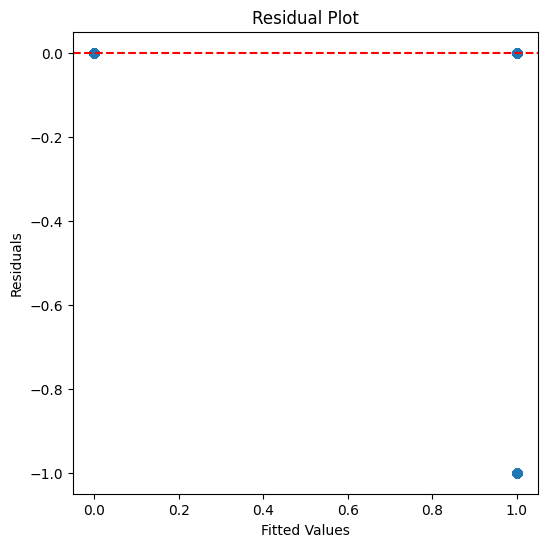

In [46]:
from sklearn.model_selection import GridSearchCV
# load_model이라고 가정하고, GridSearchCV 객체라고 가정합니다.

# 최적의 모델 찾기
best_model = load_model.best_estimator_

# 데이터에 대해 예측 수행
y_pred = best_model.predict(X_test)  # X는 입력 데이터입니다.

# 잔차 계산
residuals = Y_test - y_pred  # y는 실제 값입니다.

# 잔차 플롯 그리기
plt.figure(figsize=(6, 6))
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

### 2. AUC 계산 및 ROC 곡선

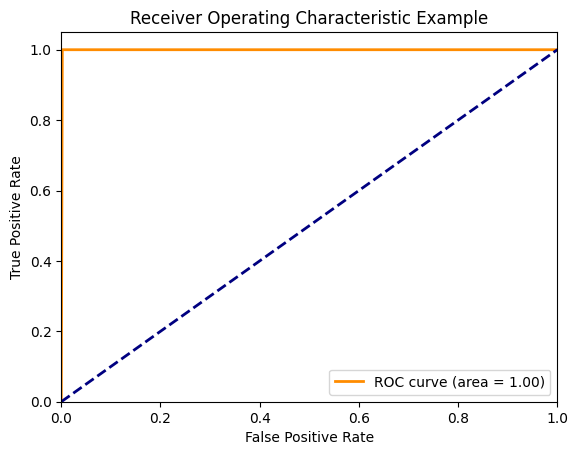

In [47]:
# ROC 곡선의 FPR, TPR, 임계값 계산
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)

# AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 곡선 그리기
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()


## 8. 기존의 하이퍼 파라미터로 찾은 SVM model + KNN model 앙상블

In [ ]:
best_knn_params = knn_grid_search.best_params_
best_svm_params = svm_grid_search.best_params_

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

# 최적의 하이퍼파라미터로 KNN과 SVM 모델을 다시 생성
knn_best = KNeighborsClassifier(**best_knn_params)
svm_best = SVC(**best_svm_params)

# 각 모델을 훈련 데이터에 적합
knn_best.fit(x_train, y_train)
svm_best.fit(x_train, y_train)

# 테스트 데이터에서 성능 평가
knn_accuracy = accuracy_score(Y_test, knn_best.predict(X_test))
svm_accuracy = accuracy_score(Y_test, svm_best.predict(X_test))

print("KNN Accuracy:", knn_accuracy)
print("SVM Accuracy:", svm_accuracy)

# 앙상블 모델 생성
ensemble = VotingClassifier(estimators=[('knn', knn_best), ('svm', svm_best)], voting='hard')

# 앙상블 모델 훈련 및 평가
ensemble_train = ensemble.fit(X_train, Y_train)
ensemble_accuracy = accuracy_score(Y_test, ensemble.predict(X_test))

print("Ensemble Accuracy:", ensemble_accuracy)

In [ ]:
 pip install joblib

In [ ]:
from joblib import dump

# 파일 경로를 각자 컴퓨터 환경에 맞게 수정하세요!
path = '/content/drive/MyDrive/부리부리데마왕/진기/'

# 모델을 파일로 저장
dump(model_svm_train, path + 'trained_svm_model.joblib')
dump(model_knn_train, path + 'trained_knn_model.joblib')
dump(ensemble_train, path + 'trained_ensemble_model.joblib')